# PISA Dataset Visual Exploration
## by Isaac Paulson

PISA is the Programme for International Student Assessment. PISA consists of a triennial survey of 15-year-old students. 

The PISA database contains the full set of responses from individual students, school principals and parents. Data for this analysis is from the 2012 PISA cycle.


## Preliminary Wrangling
Before beginning, import Numpy and Pandas for working with the data along with Matplotlib and Seaborn for the visualizatoins.

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

%matplotlib inline

First, load in the dataset as a Pandas DataFrame.

In [21]:
pisa2012 = pd.read_csv('pisa2012.csv', encoding='latin-1', low_memory=False)

Next, check the shape of the DataFrame and data types of the variables in the set.

In [22]:
# display shape
print('Shape: ')
display(pisa2012.shape)

# Set display options to see all rows and columns
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

#display datatypes
print('Data Types: ')
display(pisa2012.dtypes)

Shape: 


(485490, 636)

Data Types: 


Unnamed: 0       int64
CNT             object
SUBNATIO         int64
STRATUM         object
OECD            object
NC              object
SCHOOLID         int64
STIDSTD          int64
ST01Q01          int64
ST02Q01        float64
ST03Q01          int64
ST03Q02          int64
ST04Q01         object
ST05Q01         object
ST06Q01        float64
ST07Q01         object
ST07Q02         object
ST07Q03         object
ST08Q01         object
ST09Q01         object
ST115Q01       float64
ST11Q01         object
ST11Q02         object
ST11Q03         object
ST11Q04         object
ST11Q05         object
ST11Q06         object
ST13Q01         object
ST14Q01         object
ST14Q02         object
ST14Q03         object
ST14Q04         object
ST15Q01         object
ST17Q01         object
ST18Q01         object
ST18Q02         object
ST18Q03         object
ST18Q04         object
ST19Q01         object
ST20Q01         object
ST20Q02         object
ST20Q03         object
ST21Q01        float64
ST25Q01    

The data set looks large and complex. There are 636 variables for 485,490 students. Before selecting variables to work with, checking the head might provide some clues about what all of the variables are.

In [23]:
pisa2012.head(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

There's still a lot to work with. Using the codebook to understand the vairable names, select the ones we need: the country, the gender of each student, and the plausible value scores for math, science, and reading.

In [24]:
student_scores = pisa2012[['CNT', 'ST04Q01', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']]
display(student_scores.shape)
display(student_scores.dtypes)
display(student_scores.sample(10))

(485490, 17)

CNT         object
ST04Q01     object
PV1MATH    float64
PV2MATH    float64
PV3MATH    float64
PV4MATH    float64
PV5MATH    float64
PV1READ    float64
PV2READ    float64
PV3READ    float64
PV4READ    float64
PV5READ    float64
PV1SCIE    float64
PV2SCIE    float64
PV3SCIE    float64
PV4SCIE    float64
PV5SCIE    float64
dtype: object

,CNT,ST04Q01,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
105860,Switzerland,Female,529.9190,532.2558,568.8659,536.1505,591.4551,475.1603,468.0115,571.2718,513.2871,545.0595,500.2238,510.4812,540.3208,432.1522,515.1436
316958,Mexico,Female,338.5340,355.6707,291.7978,332.3025,381.3756,370.4702,418.9231,332.3433,385.5621,381.5905,404.0843,368.6498,352.7975,386.3670,396.6244
447825,Sweden,Female,466.9029,459.1136,424.8403,455.9978,445.0927,535.2895,513.8432,531.3180,517.0204,468.5675,473.6479,456.8631,468.0530,396.2514,457.7956
169690,Spain,Male,523.6096,550.8724,578.1352,547.7567,524.3885,526.8597,536.4830,551.7200,542.0966,523.6519,521.7643,572.1186,590.7684,515.2369,532.9541
415150,Romania,Female,391.1123,423.8277,419.9330,444.8590,401.2385,420.2734,364.6717,449.6629,453.6345,440.1312,448.2842,414.7147,392.3349,456.6766,441.7568
76637,Canada,Female,488.0122,523.8433,522.2854,544.0957,477.8860,560.3897,559.5954,606.4597,564.3613,586.6020,594.6848,590.0224,617.0645,598.4148,586.2924
417267,Romania,Female,335.5741,319.9953,350.3739,373.7420,335.5741,330.5958,357.6024,377.4601,349.6593,363.9568,271.1115,234.7445,316.8034,286.0313,230.0821
191831,United Kingdom,Female,563.3354,598.3876,605.3980,613.1874,585.9246,626.8735,672.1492,665.7947,642.7597,624.4906,661.8239,689.7986,697.2585,639.4442,603.0772
227292,Ireland,Male,568.7101,547.6788,533.6579,554.6892,552.3524,607.2948,608.8986,572.8111,600.0772,581.6325,619.8620,626.3894,575.1026,621.7270,588.1574
203957,Greece,Female,586.7814,583.6657,547.8346,546.2767,562.6344,646.9695,621.5516,657.2956,569.1271,566.7442,599.3473,635.7143,544.3305,605.8747,624.5244


Now, we can use the `student_scores` DataFrame to compare scores across countries and genders. But first, we will compute the mean of plausible scores to create a PISA score for a particular subject for each student.

In [25]:
# Compute the average of plausible scores determines the PISA score of a student in a particular subject

student_scores['AVG_MATH'] = (student_scores['PV1MATH'] + student_scores['PV2MATH'] + student_scores['PV3MATH'] + 
                        student_scores['PV4MATH'] + student_scores['PV5MATH']) / 5
student_scores['AVG_READ'] = (student_scores['PV1READ'] + student_scores['PV2READ'] + student_scores['PV3READ'] + 
                        student_scores['PV4READ'] + student_scores['PV5READ']) / 5
student_scores['AVG_SCI'] = (student_scores['PV1SCIE'] + student_scores['PV2SCIE'] + student_scores['PV3SCIE'] + 
                        student_scores['PV4SCIE'] + student_scores['PV5SCIE']) / 5

student_scores.head()

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

,CNT,ST04Q01,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,AVG_MATH,AVG_READ,AVG_SCI
0,Albania,Female,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348
1,Albania,Female,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382
2,Albania,Female,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946
3,Albania,Female,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,477.46376,453.97240
4,Albania,Female,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778


Now that we have average scores to work with, we can begin making our comparisons.

## Univariate Exploration

The wrangling being done, the first step of the analysis is to check the distribution of student scores for math, reading, and science: 

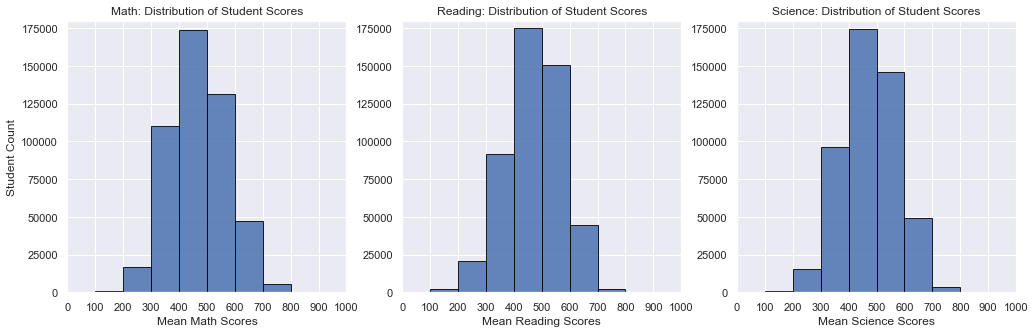

In [26]:
plt.figure(figsize = [17, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(student_scores['AVG_MATH'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Mean Math Scores');
plt.ylabel('Student Count')
plt.title("Math: Distribution of Student Scores");

plt.subplot(1, 3, 2)
plt.hist(student_scores['AVG_READ'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Mean Reading Scores');
plt.title("Reading: Distribution of Student Scores");

plt.subplot(1, 3, 3)
plt.hist(student_scores['AVG_SCI'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Mean Science Scores');
plt.title("Science: Distribution of Student Scores");

Those distributions look normal. Next, let's check the distribution of scores by country.

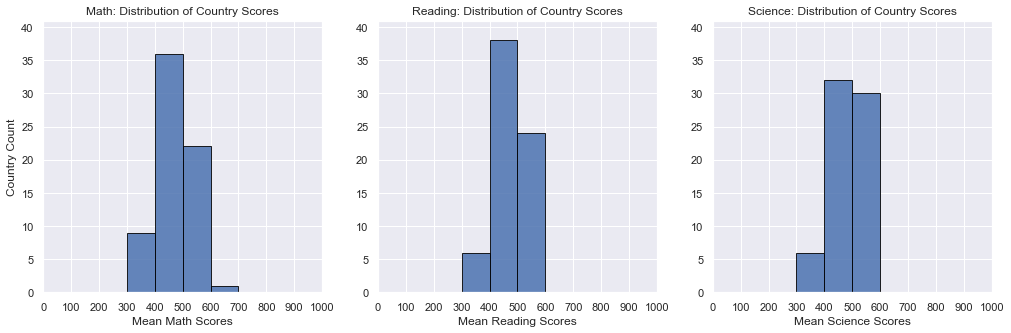

In [27]:
# set up DataFrame
country_scores = student_scores.groupby(['CNT']).mean()
country_scores.reset_index(inplace=True)

# plot distribution
plt.figure(figsize = [17, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(country_scores['AVG_MATH'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 40 + 1);
plt.xticks(bins_hist)
plt.xlabel('Mean Math Scores');
plt.ylabel('Country Count')
plt.title("Math: Distribution of Country Scores");

plt.subplot(1, 3, 2)
plt.hist(country_scores['AVG_READ'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 40 + 1);
plt.xticks(bins_hist)
plt.xlabel('Mean Reading Scores');
plt.title("Reading: Distribution of Country Scores");

plt.subplot(1, 3, 3)
plt.hist(country_scores['AVG_SCI'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 40 + 1);
plt.xticks(bins_hist)
plt.xlabel('Mean Science Scores');
plt.title("Science: Distribution of Country Scores");

These distributions look slightly less normal, possibly due to the smaller sample size. Let's see if there is another way to look at the distributions of scores for each country.

## Bivariate Exploration

I will look at the distributions of mean country scores using box-and-whisker plots. I will order the plots by score in order to see which countries were the highest and lowest performing.

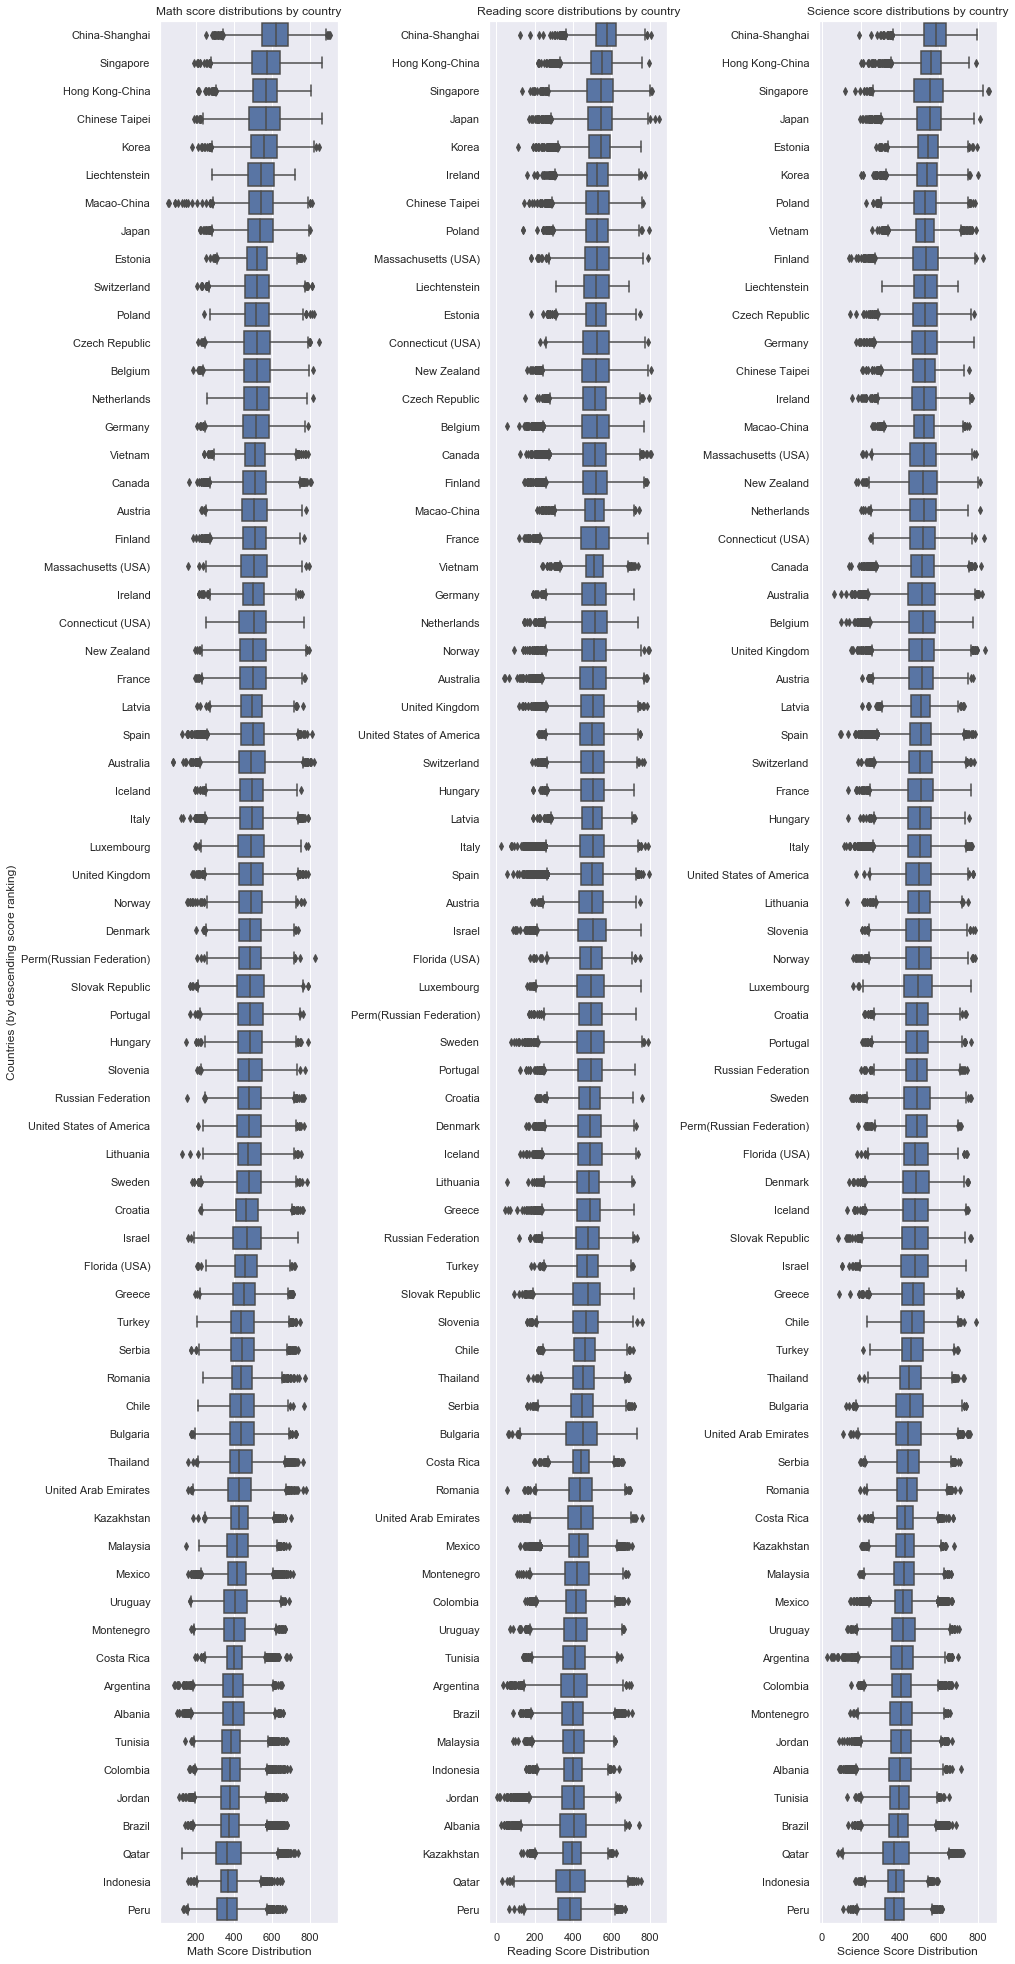

In [28]:
plt.figure(figsize = [15, 35])
plt.subplots_adjust(wspace = 0.85) # adjust spacing between subplots, in order to show long country names nicely

math_score_country_order = student_scores.groupby('CNT')['AVG_MATH'].mean().sort_values(ascending = False).index
reading_score_country_order = student_scores.groupby('CNT')['AVG_READ'].mean().sort_values(ascending = False).index
science_score_country_order = student_scores.groupby('CNT')['AVG_SCI'].mean().sort_values(ascending = False).index

# math subplot
plt.subplot(1, 3, 1)
sb.boxplot(x = student_scores['AVG_MATH'], y = student_scores['CNT'], order = math_score_country_order, color = sb.color_palette()[0]);
plt.ylabel('Countries (by descending score ranking)')
plt.xlabel('Math Score Distribution')
plt.title('Math score distributions by country');

# reading subplot
plt.subplot(1, 3, 2)
sb.boxplot(x = student_scores['AVG_READ'], y = student_scores['CNT'], order = reading_score_country_order, color = sb.color_palette()[0]);
plt.ylabel(''); # Remove the redundant label
plt.xlabel('Reading Score Distribution')
plt.title('Reading score distributions by country');

# science subplot
plt.subplot(1, 3, 3)
sb.boxplot(x = student_scores['AVG_SCI'], y = student_scores['CNT'], order = science_score_country_order, color = sb.color_palette()[0]);
plt.ylabel(''); # Remove the redundant label
plt.xlabel('Science Score Distribution')
plt.title('Science score distributions by country');

We can see that the students of Shanghai scored highest on average in all subjects, followed by Hong Kong and Singapore (Singapore scored higher than Hong Kong in math). Peru was the lowest performing on average in all subjects.

Next, I want to look at the scores of males and females. How do students in each country perform by gender?

I will use a similar plot, showing the mean score and range for males and females in each country.

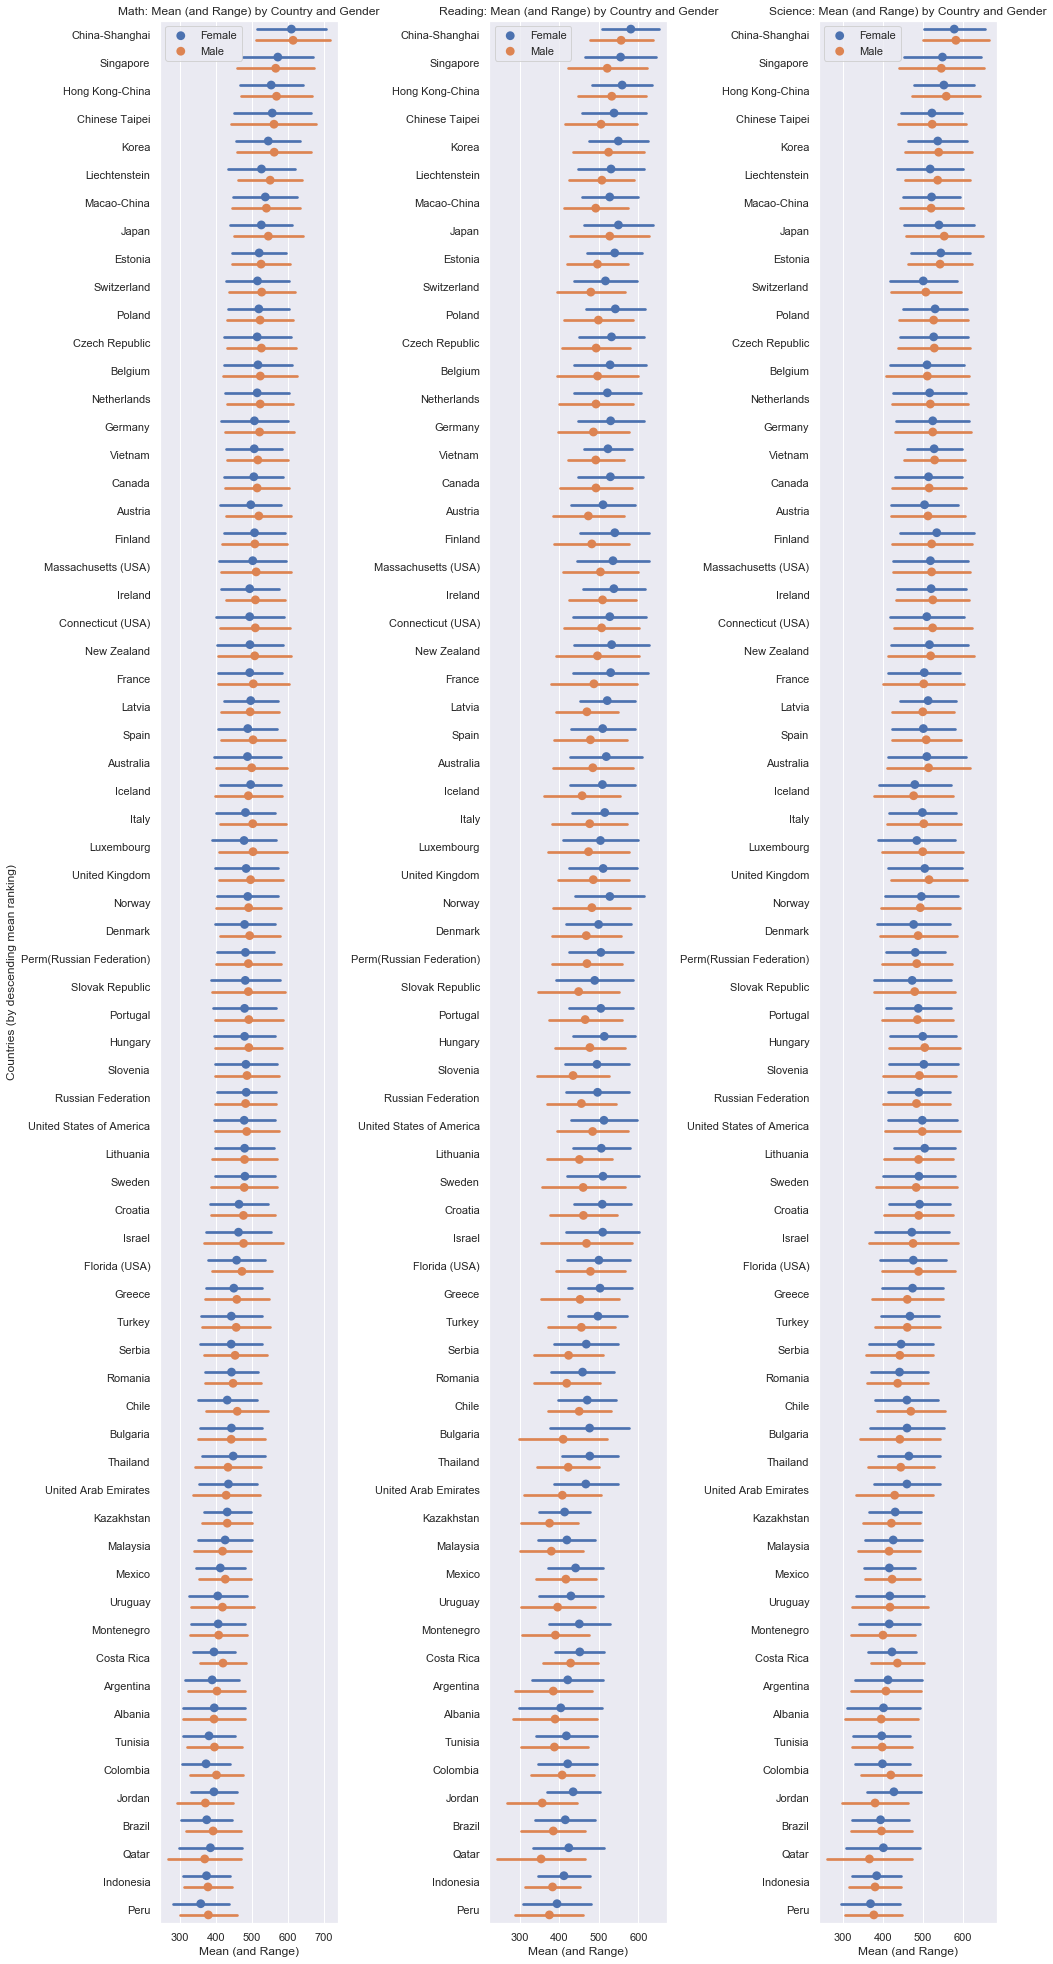

In [29]:
# set up DataFrame
male_female = student_scores.groupby(['CNT','ST04Q01']).mean().reset_index()

# plot
plt.figure(figsize = [15, 35])
plt.subplots_adjust(wspace = 0.85)

## math subplot
plt.subplot(1, 3, 1)
sb.pointplot(x = 'AVG_MATH', y = 'CNT', hue = student_scores['ST04Q01'], data = student_scores,
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = math_score_country_order)
plt.legend(loc = 2)
plt.title('Math: Mean (and Range) by Country and Gender')
plt.ylabel('Countries (by descending mean ranking)')
plt.xlabel('Mean (and Range)');

## reading subplot
plt.subplot(1, 3, 2)
sb.pointplot(x = 'AVG_READ', y = 'CNT', hue = student_scores['ST04Q01'], data = student_scores, 
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = reading_score_country_order)
plt.legend(loc = 2)
plt.title('Reading: Mean (and Range) by Country and Gender')
plt.ylabel('')
plt.xlabel('Mean (and Range)');

## science subplot
plt.subplot(1, 3, 3)
sb.pointplot(x = 'AVG_SCI', y = 'CNT', hue = student_scores['ST04Q01'], data = student_scores, 
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = science_score_country_order)
plt.legend(loc = 2)
plt.title('Science: Mean (and Range) by Country and Gender')
plt.ylabel('')
plt.xlabel('Mean (and Range)');

In math and science, males performed mostly better or about the same as females in almost every country. On the other hand, interestingly, females scored noticeably higher in reading in *all* countries.

Is there another way to look at this data that can explain this relationship?

## Multivariate Exploration

Let's check how the test scores correlate between subjects.

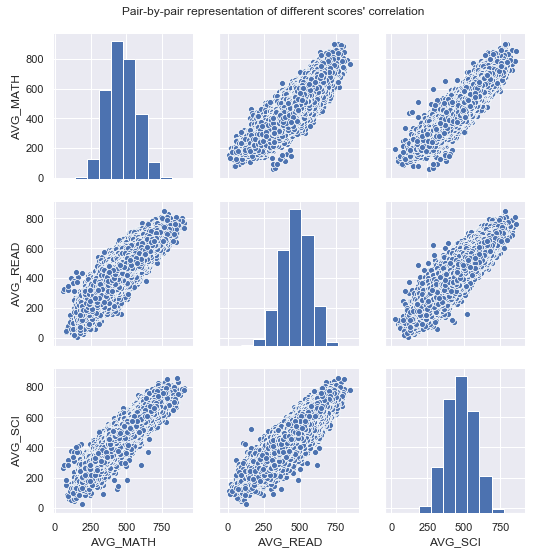

In [30]:
grid = sb.pairplot(data = student_scores, vars=["AVG_MATH", "AVG_READ", "AVG_SCI"])
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

Those correlations look exactly as we expect they would. Students who score high in one subject score higher in the other subjects as well.

We observed earlier that females score higher in reading. Do these correlations hold when broken down by gender?

I will look at males, then females.

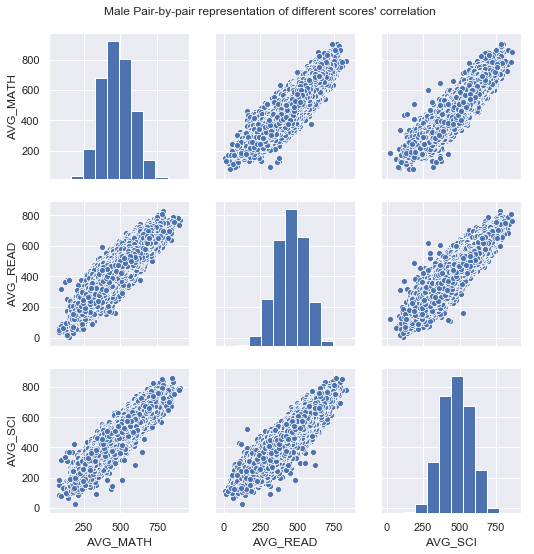

In [31]:
# males
grid = sb.pairplot(data = student_scores.loc[student_scores['ST04Q01'] == 'Male'], vars=["AVG_MATH", "AVG_READ", "AVG_SCI"])
grid.fig.suptitle("Male Pair-by-pair representation of different scores' correlation", y = 1.02);

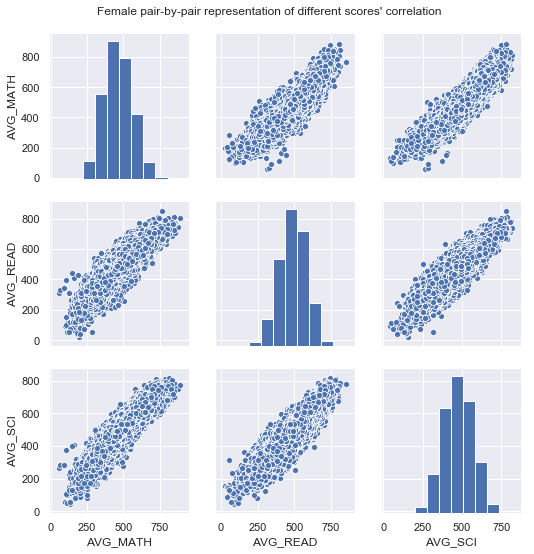

In [33]:
# females
grid = sb.pairplot(data = student_scores.loc[student_scores['ST04Q01'] == 'Female'], vars=["AVG_MATH", "AVG_READ", "AVG_SCI"])
grid.fig.suptitle("Female pair-by-pair representation of different scores' correlation", y = 1.02);

The correlations between test scores hold for both males and females.

## Conclusions

We saw that females consistently score higher on average in reading. However, test scores are correlated across subject areas for both boys and girls. In genreral, girls don't score high in reading and low on the other assessments. Girls who score high in reading also score high in math, and so on.

Moving forward, I would like to explore. What other types of variables might be related to higher reading scores for girls? For example, there are many variables in the original 2012 dataset related to confidence in math. Perhaps this type of variable exists for reading in datasets from other PISA cycles.

Run the code below to see the highlights as a slideshow:

In [1]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 730022 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\isaac\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 9, in <module>
    sys.exit(main())
  File "C:\Users\isaac\Anaconda3\lib\site-packages\jupyter_core\application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\isaac\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\isaac\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 325, in start
    self.convert_notebooks()
  File "C:\Users\isaac\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 493, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File 